In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math as math
from collections import OrderedDict, defaultdict

In [38]:
train_features = pd.read_csv("train-features.txt", sep= " ", header=None)
train_labels = pd.read_csv("train-labels.txt", sep= " ", header=None)
test_features = pd.read_csv("test-features.txt", sep= " ", header=None)
test_labels = pd.read_csv("test-labels.txt", sep= " ", header=None)
spmsga1 = pd.read_csv("spmsga1.txt", sep= " ", header=None)

In [39]:
#Train Data
train_features.columns = ["Msg Number", "Word Counter", "Number of Occurrences"]
train_labels.columns = ["Spam/Ham"]

#Test Data
test_features.columns = ["Msg Number", "Word Counter", "Number of Occurrences"]
test_labels.columns = ["Spam/Ham"]
test_labels.insert(0, "Msg Number", range(1, 1 + len(test_labels)))

In [40]:
print(train_labels)

     Spam/Ham
0           0
1           0
2           0
3           0
4           0
..        ...
695         1
696         1
697         1
698         1
699         1

[700 rows x 1 columns]


In [41]:
spam_length = len( train_labels[ train_labels['Spam/Ham'] == 1])
ham_length = len( train_labels[ train_labels['Spam/Ham'] == 0])

test_length_spam = len( test_labels[ test_labels['Spam/Ham'] == 1])
test_length_ham = len( test_labels[ test_labels['Spam/Ham'] == 0])

test_PofSpam = (test_length_spam /  test_length_spam + test_length_ham )
test_PofHam = (test_length_ham /  test_length_spam + test_length_ham )

In [42]:
S_Dict = defaultdict(int)
H_Dict = defaultdict(int)

In [43]:
#spam_dict['word'] returns number of occurences of word in spam
#ham_dic['word'] returns number of occurences of word in ham 
for index,row in train_features.iterrows():
    if train_labels["Spam/Ham"].values[row["Msg Number"]-1] == 1:
        S_Dict[row["Word Counter"]] += row["Number of Occurrences"]
    else:
        H_Dict[row["Word Counter"]] += row["Number of Occurrences"]

In [44]:
#H_Dict
#S_Dict

In [57]:
result_dict = defaultdict(int)
#Finding Probability of Spam for Each Word
num = -1
PofSpam = 0
PofHam = 0
for index,row in test_features.iterrows():
    
    if (num != row["Msg Number"]):
        
        if PofSpam + math.log(test_PofSpam) > PofHam + math.log(test_PofHam):
            result_dict[num] = 1
        else:
            result_dict[num] = 0

        PofSpam = 0
        PofHam = 0

   
    #Applied Laplase Smoothing to Avoid 0s
    PofXInSpam = ( S_Dict[row["Word Counter"]] + 1 ) / (spam_length + 2 )
    PofXInHam = ( H_Dict[row["Word Counter"]] + 1 ) / (ham_length + 2 )
    
    #Applied Log to manage the underflow of data
    PofSpam += ( math.log( PofXInSpam ) * row["Number of Occurrences"] )
    PofHam += ( math.log( PofXInHam ) * row["Number of Occurrences"] )

    num = row["Msg Number"]
    
#For the last Result
if PofSpam + math.log(test_PofSpam) > PofHam + math.log(test_PofHam):
    result_dict[num] = 1
else:
    result_dict[num] = 0

In [58]:
#print(result_dict)
result_dict.pop(-1)
predicted_result = pd.DataFrame.from_dict(result_dict, orient="index")
predicted_result.columns = ["Spam/Ham"]
predicted_result.insert(0, "Msg Number", range(1, 1 + len(predicted_result)))

In [59]:
total_matches = np.sum(predicted_result["Spam/Ham"].values == test_labels["Spam/Ham"].values)
accuracy = total_matches/len(predicted_result)
accuracy*100

96.92307692307692

Text(0, 0.5, 'Msg Number')

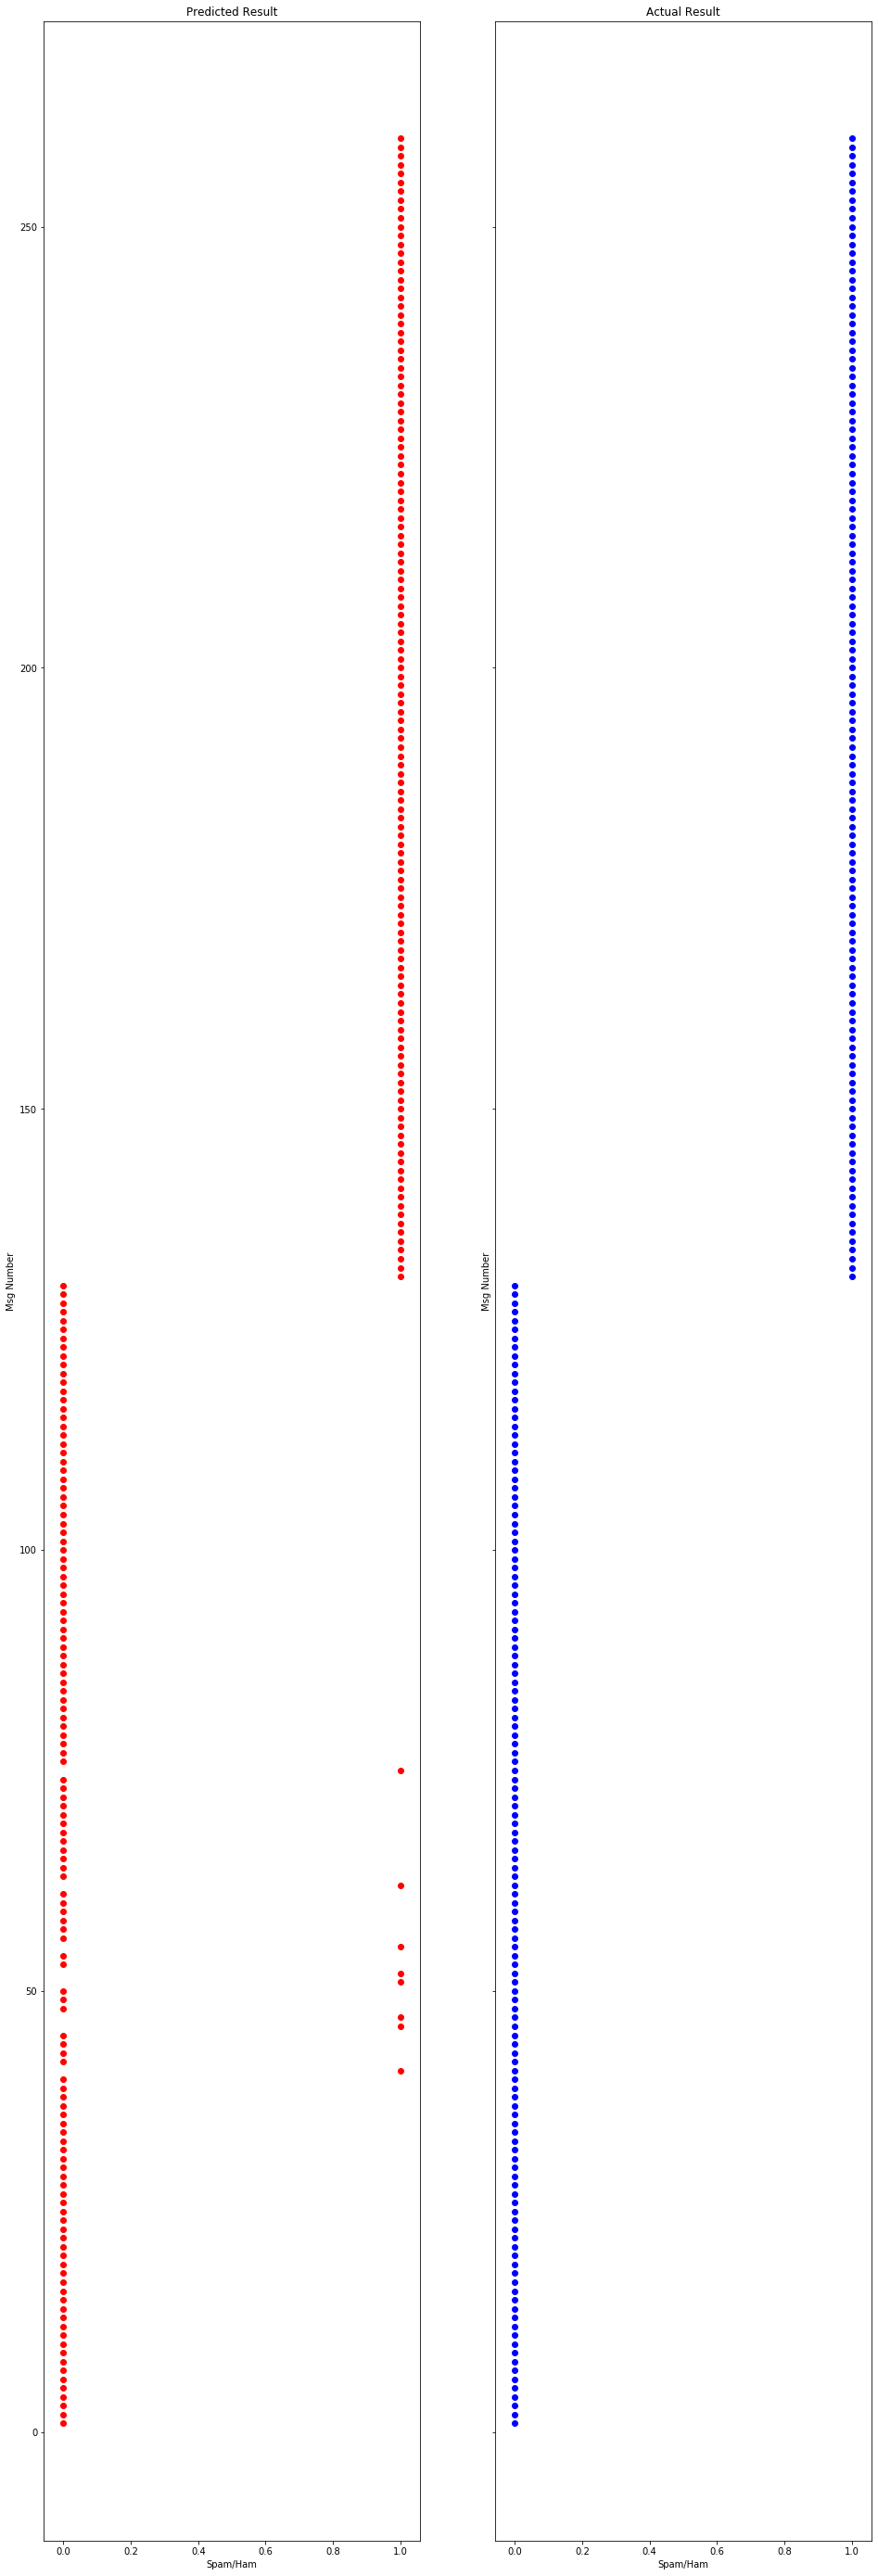

In [61]:
fig, arr = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=True)

fig.set_figwidth(16)
fig.set_figheight(50)

arr[0].scatter (predicted_result['Spam/Ham'],predicted_result['Msg Number'], c='r' )
arr[0].set_title('Predicted Result')
arr[0].set_xlabel('Spam/Ham')
arr[0].set_ylabel('Msg Number')

arr[1].scatter (test_labels['Spam/Ham'],test_labels['Msg Number'], c='b' )
arr[1].set_title('Actual Result')
arr[1].set_xlabel('Spam/Ham')
arr[1].set_ylabel('Msg Number')